In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# data Prep
df= pd.read_csv('C:/Users/RAJAT/Desktop/Projects/mnist_train.csv')

In [3]:
df.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
df.shape

(42000, 785)

In [6]:
data=df.values
print(data.shape)
print(type(data))

(42000, 785)
<class 'numpy.ndarray'>


In [7]:
X=data[:,1:]
Y=data[:,0]

In [8]:
print(X)

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [9]:
print(Y)

[1 0 1 ... 7 6 9]


In [10]:
print(X.shape,Y.shape)

(42000, 784) (42000,)


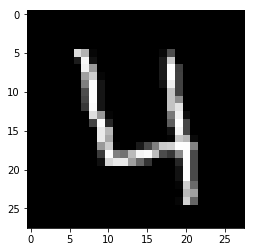

4


In [18]:
#draw Image
def drawImg(sample):
    img=sample.reshape((28,28))
    plt.imshow(img,cmap='gray')
    plt.show()

drawImg(X[3])
print(Y[3])

In [19]:
from sklearn.model_selection import train_test_split

In [20]:
X_train,X_test,Y_train,Y_test= train_test_split(X,Y,test_size=0.2)


print(X_test.shape)
print(X_train.shape)
print(Y_test.shape)
print(Y_train.shape)

(8400, 784)
(33600, 784)
(8400,)
(33600,)


In [21]:
def dist(x1,x2):
    return np.sqrt(sum((x1-x2)**2))


def knn(X,Y,queryPoint,k=5):
    
    vals = []
    m = X.shape[0]
    
    for i in range(m):
        d = dist(queryPoint,X[i])
        vals.append((d,Y[i]))
    vals= sorted(vals) #Sorted according to nearest to farest
    # K Nearest Neighbour
    # picking First 5 best neighbours
    # print(vals)
     # Nearest/First K points
    vals = vals[:k]
    
    vals = np.array(vals)
    
    print(vals)
    
    new_vals = np.unique(vals[:,1],return_counts=True)
    print(new_vals)
    
    index = new_vals[1].argmax()
    pred = new_vals[0][index]
    
    return pred

In [22]:
pred=knn(X_train,Y_train,X_test[0])

[[811.76720801   9.        ]
 [822.1824615    9.        ]
 [911.01426992   7.        ]
 [971.69336727   9.        ]
 [976.65295781   9.        ]]
(array([7., 9.]), array([1, 4], dtype=int64))


In [23]:
print(pred)

9.0


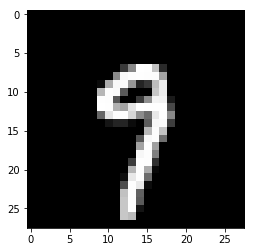

9


In [26]:
drawImg(X_test[0])
print(Y_test[0])